In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [2]:
df = pd.read_csv("virat.csv")

In [3]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [11]:
df.Runs=df.Runs.apply(lambda x:pd.to_numeric(x.replace('*','')))

In [15]:
df['Runs'].describe(percentiles = [0.25,0.5,1]) 

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
100%     154.000000
max      154.000000
Name: Runs, dtype: float64

In [14]:
## Your code here
q3, q1 = np.percentile(df.Runs, [50 ,25])
iqr = q3 - q1
iqr

22.5

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


{'whiskers': [<matplotlib.lines.Line2D at 0x7fac3ba391c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fac3bba77f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fac3ba39f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fac3bba79a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fac3cdfe4f0>],
 'means': []}

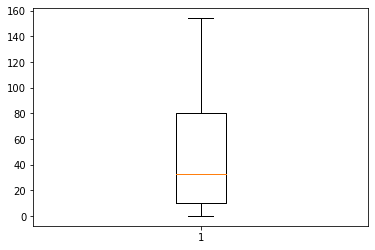

In [16]:
#Your code here
plt.boxplot(df.Runs)

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [17]:
## Your code here
df['Date']=pd.to_datetime(df['Start Date'])

In [23]:
df['Year']=df.Date.dt.year
df.Year.value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: Year, dtype: int64

In [25]:
df.groupby('Year').sum().sort_values('Runs')

,Runs,BF,4s,6s,Pos,Inns
Year,,,,,,
2008,159,239,21,1,7,7
2017,185,173,18,5,9,5
2009,230,257,26,1,29,9
2015,304,376,15,7,33,15
2012,444,538,36,1,34,17
2010,726,829,69,4,50,26
2016,739,739,62,8,30,16
2014,995,976,89,19,56,28
2013,1100,1088,120,19,69,36


In [26]:
df[df.Runs==df.Runs.max()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Date,Year
126,154,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,23-Oct-16,2016-10-23,2016


In [27]:
df.groupby('Year').mean().sort_values('Runs')

,Runs,BF,4s,6s,Pos,Inns
Year,,,,,,
2015,30.400000,37.600000,1.500000,0.700000,3.300000,1.500000
2008,31.800000,47.800000,4.200000,0.200000,1.400000,1.400000
2009,38.333333,42.833333,4.333333,0.166667,4.833333,1.500000
2012,40.363636,48.909091,3.272727,0.090909,3.090909,1.545455
2011,42.000000,48.387097,3.903226,0.225806,3.838710,1.580645
2010,45.375000,51.812500,4.312500,0.250000,3.125000,1.625000
2013,47.826087,47.304348,5.217391,0.826087,3.000000,1.565217
2014,58.529412,57.411765,5.235294,1.117647,3.294118,1.647059
2017,61.666667,57.666667,6.000000,1.666667,3.000000,1.666667


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [41]:
df.Mins=df.Mins.apply(lambda x:pd.to_numeric(x.replace('-','')))

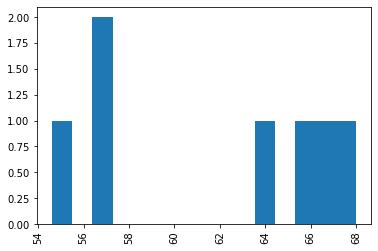

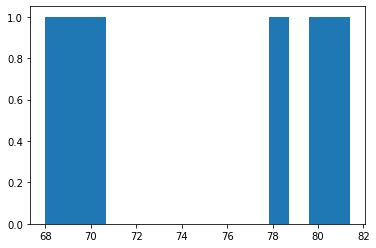

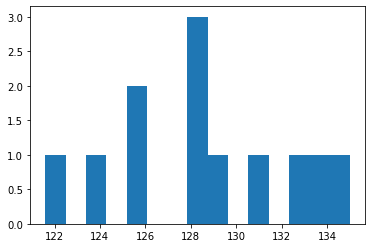

In [42]:
#Your code here
plt.xticks(rotation='vertical')
plt.hist(df.Mins,bins=15,range=(54.6,68))
plt.show()
plt.hist(df.Mins,bins=15,range=(68,81.4))
plt.show()
plt.hist(df.Mins,bins=15,range=(121.6,135))
plt.show()